# BUSINESS ANALYTICS OF A BIBYCLES COMPANY

# 1. Introduction

## Report goal
There is a small fictional cycling company that sells bicycles in different countries around the world. They would like to increase their revenue and improve their business. To do this, they provided a dataset with all their transactions in the years 2013-2014. This dataset includes product-level information about sales, profits, market segments, and geographic distribution.

The main idea is to use these details to gain new insights to create or improve the marketing and sales strategy.

Specifically, it will be analyze:
- the sales trends over time using a line chart to highlight seasonality or trends;
- the sales difference across regions using a heat map or bar chart;
- the top-selling products using visualization charts (pie chart or bar chart);
- the relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression.

## Database description
The database is composed by 700 rows and 16 columns:
- segment:
- country:
- product:
- discount band:
- unit sold:
- manufactoring price:
- sale price:
- gross sales:
- discount:
- sales:
- COGS:
- profit:
- date: 
- month number
- month name
- year


#### Packages

In [781]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import statsmodels.api as sm
from xgboost import XGBRegressor


# 2. Loading and inspection of the dataset

Data import with API

In [782]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvaarya25/financials")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pzele\.cache\kagglehub\datasets\atharvaarya25\financials\versions\1


In [783]:
import pandas as pd

df = pd.read_csv(f"{path}/Financials.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


Dataset overview

In [784]:
# copy of the dataset
df_copy = df.copy(deep=True)

In [785]:
# number or rows and columns
df.shape

(700, 16)

In [786]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

# 3. Cleaning of the dataset

Cleaning the column names

In [787]:
# check the column names
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

In [788]:
# column names with anomalous spaces
columns_whiteSpaceName = df.columns[df.columns.str.startswith(" ") | df.columns.str.endswith(" ")]
columns_whiteSpaceName

Index([' Product ', ' Discount Band ', ' Units Sold ', ' Manufacturing Price ',
       ' Sale Price ', ' Gross Sales ', ' Discounts ', '  Sales ', ' COGS ',
       ' Profit ', ' Month Name '],
      dtype='object')

In [789]:
# remove white spaces
df.columns = df.columns.str.strip()

Cleaning the column values

In [790]:
# columns type
df.dtypes

Segment                object
Country                object
Product                object
Discount Band          object
Units Sold             object
Manufacturing Price    object
Sale Price             object
Gross Sales            object
Discounts              object
Sales                  object
COGS                   object
Profit                 object
Date                   object
Month Number            int64
Month Name             object
Year                    int64
dtype: object

In [791]:
df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014


In [792]:
# remove $ and space
columns_withDollar = ['Units Sold', 'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', 'Sales', 'COGS', 'Profit']

for col in columns_withDollar:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace('$', '')
        df[col] = df[col].str.replace(',', '')
        df[col] = df[col].apply(lambda x: x.strip())

df.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,-,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,-,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,-,32670.00,21780.00,10890.00,01/06/2014,6,June,2014


In [793]:
# changing Discount column
df['Discounts'] = df['Discounts'].replace('-', 0)

In [794]:
# check again for unusual symbols
for col in columns_withDollar:
    print(f"Check column: {col}")
    print(df[col][df[col].str.contains(r'^\s*$|^-|^\$|\(|\)', na=False)].unique())

Check column: Units Sold
[]
Check column: Manufacturing Price
[]
Check column: Sale Price
[]
Check column: Gross Sales
[]
Check column: Discounts
[]
Check column: Sales
[]
Check column: COGS
[]
Check column: Profit
['-' '(4533.75)' '(3740.00)' '(2981.25)' '(1076.25)' '(880.00)'
 '(1008.75)' '(2217.50)' '(2380.00)' '(6887.50)' '(4968.75)' '(9375.00)'
 '(13173.75)' '(7826.25)' '(6168.75)' '(3727.50)' '(7700.00)' '(5570.00)'
 '(11606.25)' '(17481.25)' '(3543.75)' '(13187.50)' '(5481.25)'
 '(25841.25)' '(11115.00)' '(13530.00)' '(11970.00)' '(14370.00)'
 '(2557.50)' '(18967.50)' '(4342.50)' '(21358.75)' '(4847.50)'
 '(27693.75)' '(12538.75)' '(8286.25)' '(24160.00)' '(21560.00)'
 '(23870.00)' '(17808.75)' '(18663.75)' '(12787.50)' '(35262.50)'
 '(19687.50)' '(35550.00)' '(16142.50)' '(38046.25)' '(14918.75)'
 '(9116.25)' '(33522.50)' '(40617.50)' '(7590.00)']


In [795]:
(df['Profit']=='-').sum()
# there are only 5 values in Profit column with "-", they will be considered as NaN values

np.int64(5)

In [796]:
# change Profit column
df['Profit'] = df['Profit'].str.strip('()')
df['Profit'] = df['Profit'].replace('-', None)


In [797]:
# change column types
for col in columns_withDollar:
    if df[col].dtype == 'object':
        df[col] = df[col].astype(float)

In [798]:
# Date column in date type
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [799]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               695 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [800]:
df = df.dropna()

# change column types
for col in columns_withDollar:
    if df[col].dtype == 'float':
        df[col] = df[col].astype(int)

In [801]:
# controll of the values
round(df[columns_withDollar].describe(), 2)

# It seems not to be strange values, cleaning data completed

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit
count,695.00,695.00,695.00,695.00,695.00,695.00,695.00,695.00
mean,1609.58,96.75,118.38,182791.32,13193.37,169597.38,145290.19,26544.08
std,867.79,108.61,137.27,255038.27,23037.42,237441.03,204428.18,41515.20
min,200.00,3.00,7.00,1799.00,0.00,1655.00,918.00,285.00
25%,905.00,5.00,12.00,17325.00,798.00,15851.00,7480.00,4013.00
50%,1545.00,10.00,20.00,37080.00,2559.00,34736.00,21980.00,11135.00
75%,2230.50,250.00,300.00,280850.00,16164.50,261575.00,245905.00,23918.50
max,4492.00,260.00,350.00,1207500.00,149677.00,1159200.00,950625.00,262200.00


# 4. Exploratory Data Analysis

In [802]:
df_copy2 = df.copy(deep=True)

In [803]:
# set Date column as index
df = df.set_index("Date")

In [804]:
df = df.drop(["Month Number", "Month Name", "Year"], axis=1)

Descriptive statistics

In [805]:
import matplotlib.pyplot as plt
import seaborn as sns

- categorical variables

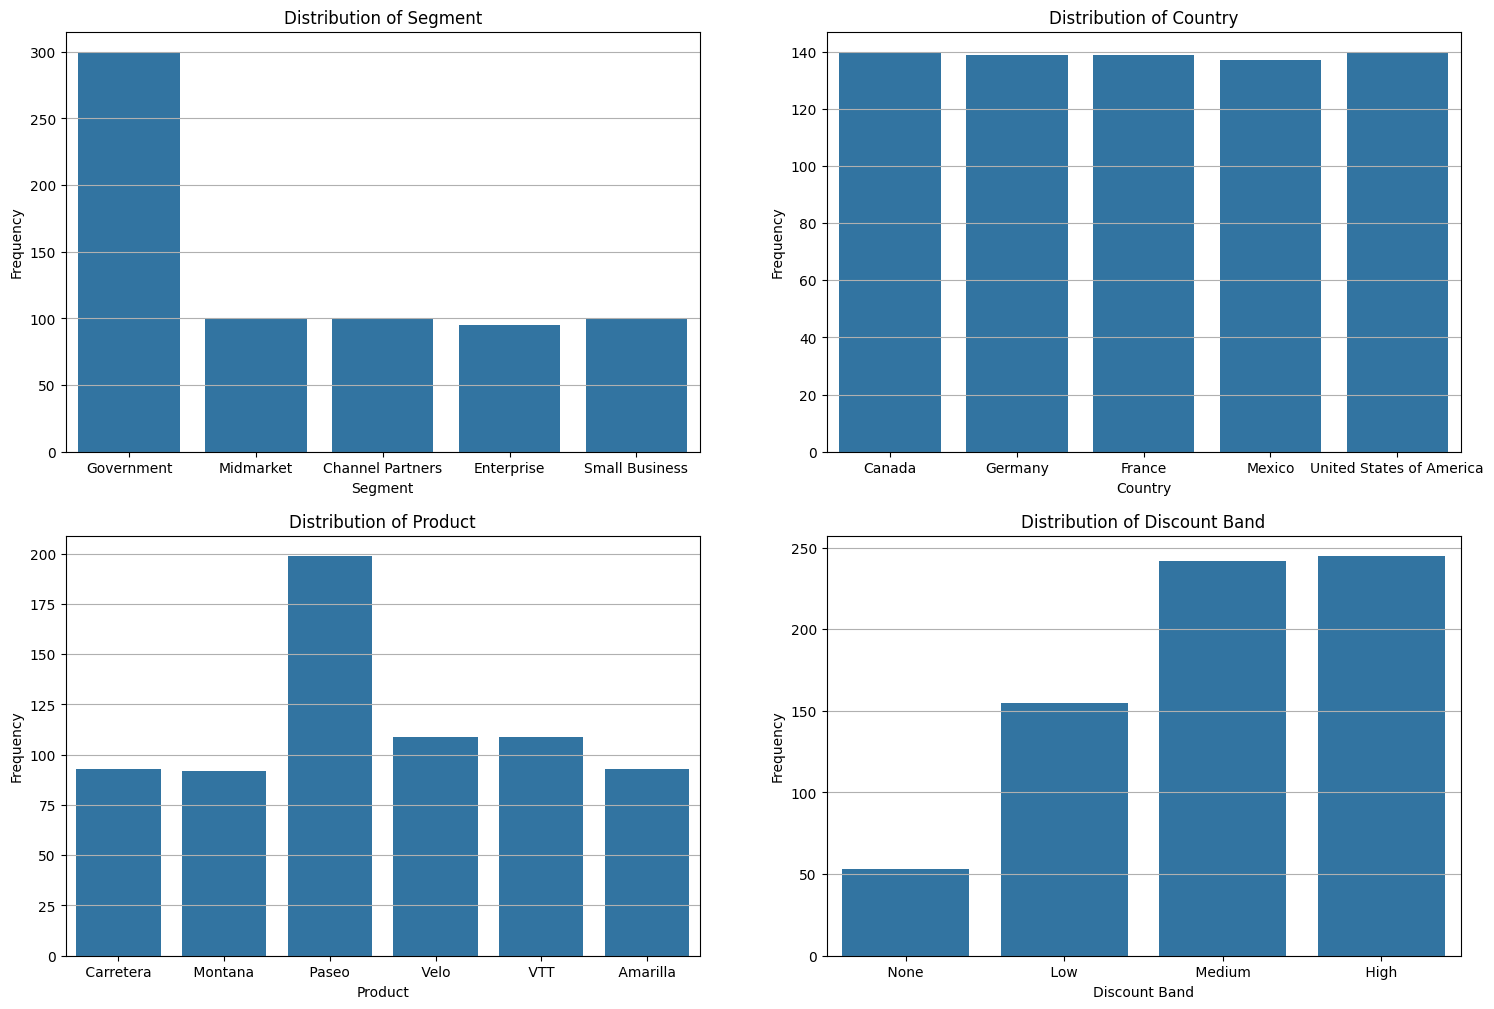

In [806]:
# selection of the categorical variables
categorical_columns = df.select_dtypes(include='object').columns

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.ravel()

# barplot for the categorical vars
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

In [807]:
# percentage table
def percentageTable(col): 
    percentage = round(df[col].value_counts(normalize=True)*100, 2)
    
    table = pd.DataFrame({
        'Category': percentage.index,
        'Percentage (%)': percentage.values
        })
    print(f"Variable {col}")
    print(table.to_string(index=False))
    print("\n")

In [808]:
# Segment
percentageTable('Segment')

Variable Segment
        Category  Percentage (%)
      Government           43.17
       Midmarket           14.39
Channel Partners           14.39
  Small Business           14.39
      Enterprise           13.67




In [809]:
# Country
percentageTable('Country')

Variable Country
                Category  Percentage (%)
                  Canada           20.14
United States of America           20.14
                 Germany           20.00
                  France           20.00
                  Mexico           19.71




In [810]:
# Product
percentageTable('Product')

Variable Product
   Category  Percentage (%)
     Paseo            28.63
      Velo            15.68
       VTT            15.68
 Carretera            13.38
  Amarilla            13.38
   Montana            13.24




In [811]:
# Discount Band
percentageTable('Discount Band')

Variable Discount Band
Category  Percentage (%)
   High            35.25
 Medium            34.82
    Low            22.30
   None             7.63




- quantitative variables

In [812]:
# selection of the quantitative variables
numerical_columns = df.select_dtypes(include='number').columns

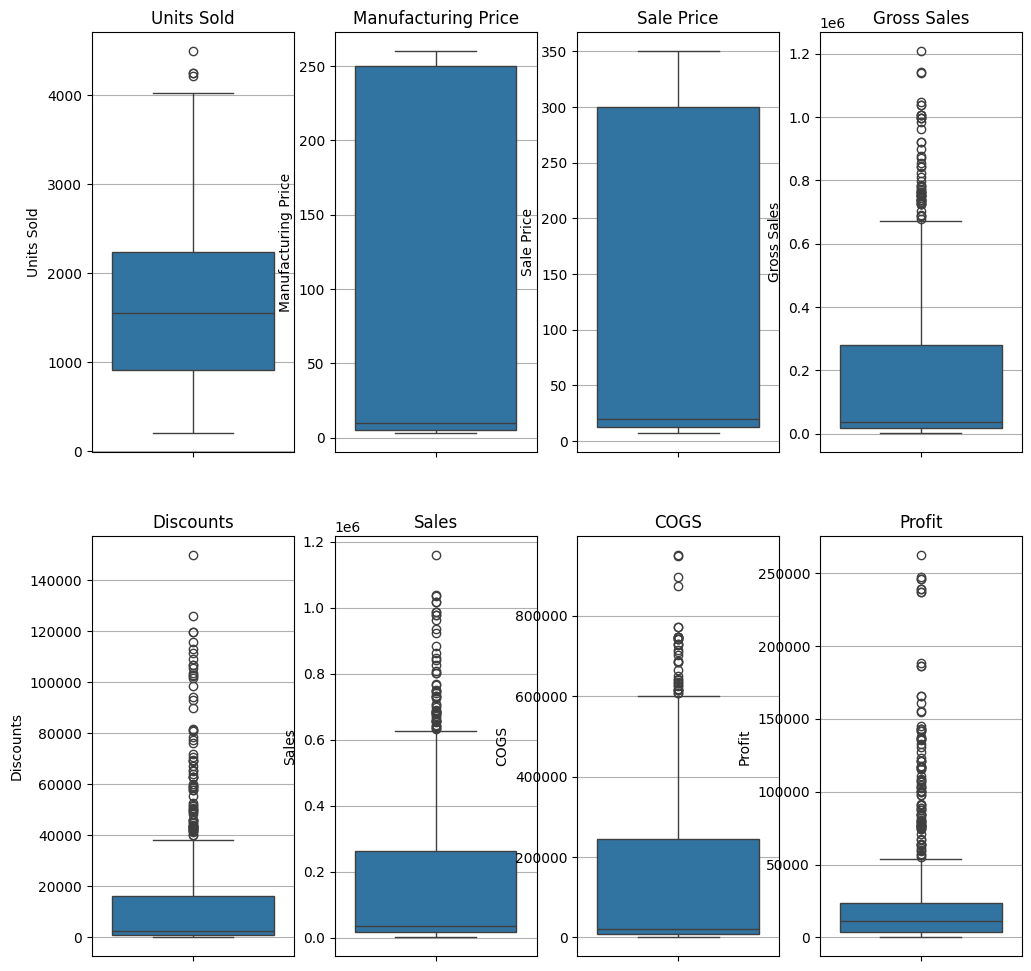

In [813]:
fig, axes = plt.subplots(2, 4, figsize=(12, 12))
axes = axes.ravel()

#  boxlot of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])  # Boxplot per la variabile corrente
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y')

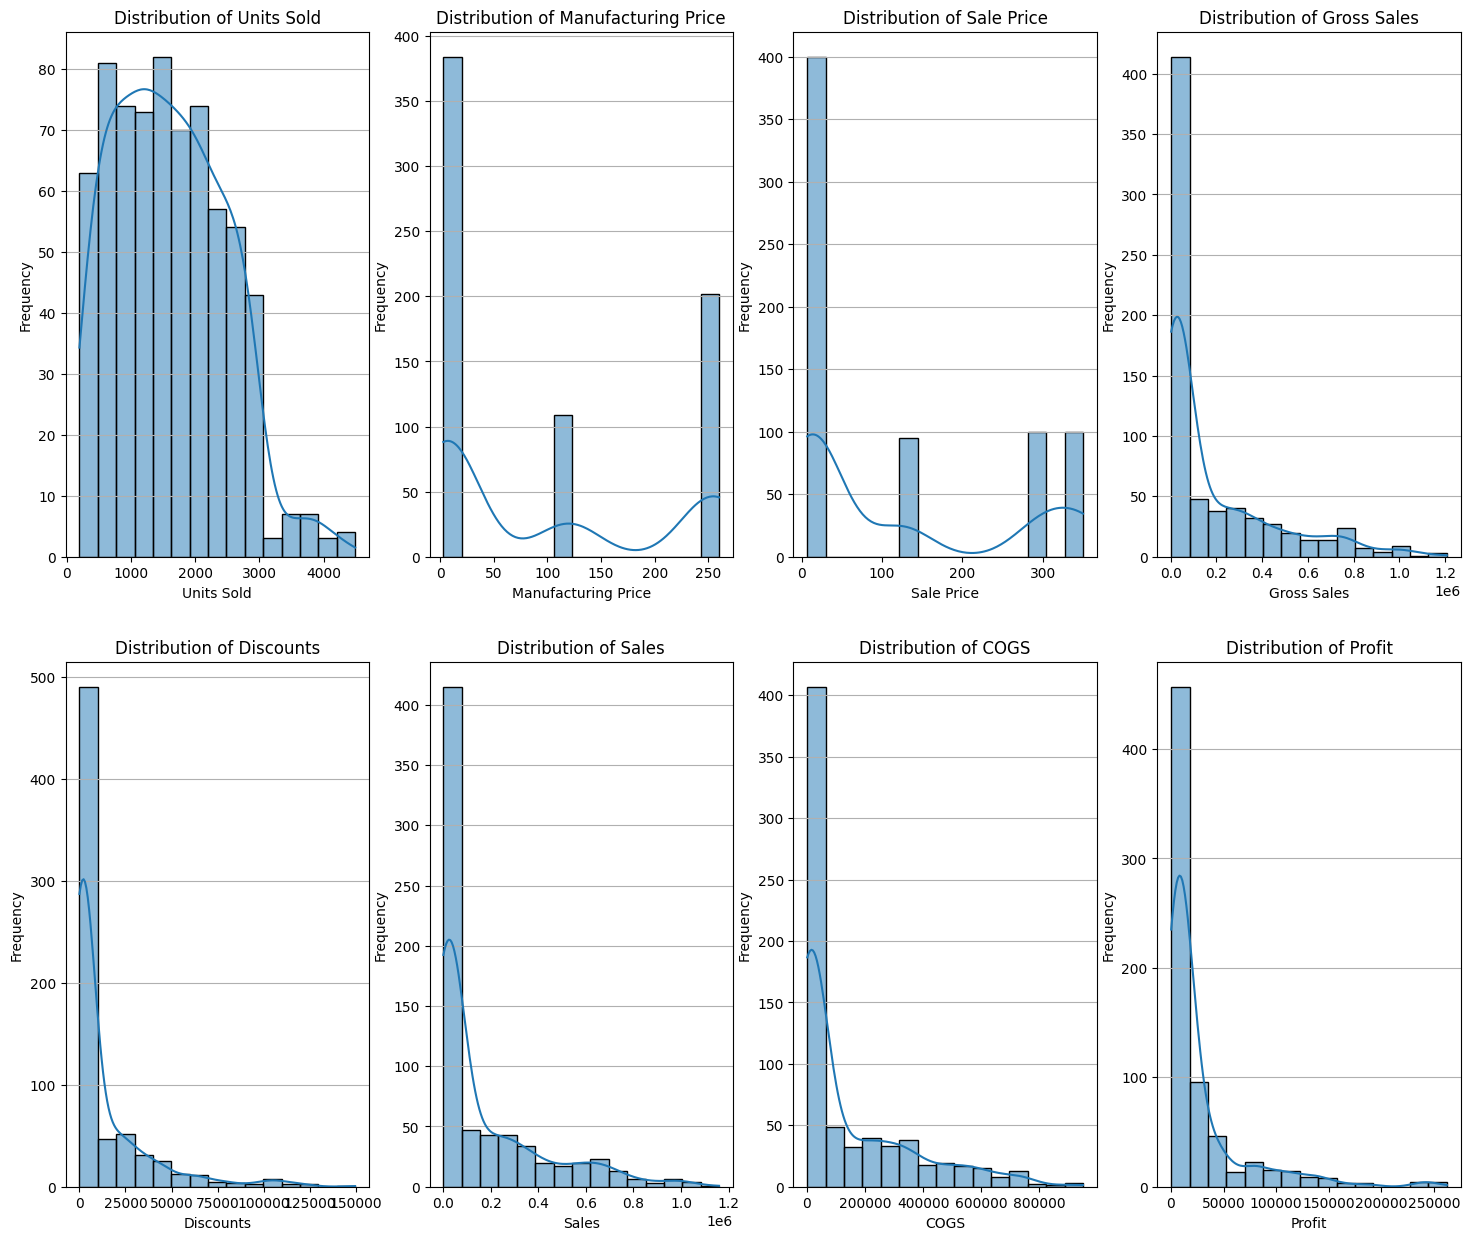

In [814]:
fig, axes = plt.subplots(2, 4, figsize=(18, 15))
axes = axes.ravel()

# histogram and distribution of the quantitativa vars
for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, bins=15, ax=axes[i])  # Specifica l'asse
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y')

# 5. Statistical analysis

sales trends over time using a line chart to highlight seasonality or trends

In [815]:
df.index = pd.to_datetime(df.index)

In [816]:
print(df.head())

               Segment  Country      Product Discount Band  Units Sold  \
Date                                                                     
2014-01-01  Government   Canada   Carretera          None         1618   
2014-01-01  Government  Germany   Carretera          None         1321   
2014-06-01   Midmarket   France   Carretera          None         2178   
2014-06-01   Midmarket  Germany   Carretera          None          888   
2014-06-01   Midmarket   Mexico   Carretera          None         2470   

            Manufacturing Price  Sale Price  Gross Sales  Discounts  Sales  \
Date                                                                         
2014-01-01                    3          20        32370          0  32370   
2014-01-01                    3          20        26420          0  26420   
2014-06-01                    3          15        32670          0  32670   
2014-06-01                    3          15        13320          0  13320   
2014-06-01   

In [817]:
monthly_sales = df.groupby(df.index.to_period('M'))['Sales'].sum()

In [818]:
print(monthly_sales)

Date
2013-09     4483990
2013-10     9295588
2013-11     7267195
2013-12     5368433
2014-01     6607750
2014-02     7297523
2014-03     5491449
2014-04     6835884
2014-05     6210202
2014-06     9518876
2014-07     7744349
2014-08     5864614
2014-09     6398687
2014-10    12375798
2014-11     5384202
2014-12    11725642
Freq: M, Name: Sales, dtype: int64


In [819]:
fig = go.Figure()

# Add the sales data as a line plot
fig.add_trace(go.Scatter(
    x=monthly_sales.index.astype(str),
    y=monthly_sales.values,
    mode='lines+markers',
    name='Total Sales',
    line=dict(color='blue', width=2),
    marker=dict(size=8, color='blue', line=dict(width=1, color='black'))
))

fig.update_layout(
    title=dict(
        text="Sales Trends Over Time",
        font=dict(size=20),
        x=0.5,  # Center the title
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(
            text="Month",
            font=dict(size=16)
        ),
        tickangle=-45,
        showgrid=True,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(
            text="Total Sales",
            font=dict(size=16)
        ),
        showgrid=True,
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()

sales difference across regions using a heat map or bar chart

In [820]:
country_sales = df.groupby('Country')['Sales'].sum().sort_values()

In [821]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=country_sales.index,
    y=country_sales.values,
    marker=dict(
        color=country_sales.values,
        colorscale='RdYlGn',
        cmin=country_sales.values.min(),
        cmax=country_sales.values.max(),
        showscale=True
    ),
    name='Total Sales'
))

fig.update_layout(
    title=dict(
        text="Sales Difference Across Countries",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(
            text="Country",
            font=dict(size=16)
        ),
        tickangle=-45,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(
            text="Total Sales",
            font=dict(size=16)
        ),
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    width=1000,
    height=600
)

# Show the chart
fig.show()

In [822]:
regional_sales = df.groupby(['Country', 'Segment'])['Sales'].sum().unstack()

In [823]:
fig = go.Figure(data=go.Heatmap(
    z=regional_sales.values,
    x=regional_sales.columns,
    y=regional_sales.index,
    colorscale=[[0, 'red'], [0.5, 'white'], [1, 'green']],
    text=regional_sales.values,
    texttemplate="%{text:,}",
    textfont=dict(size=12, color="black"),
    colorbar=dict(
        title=dict(
            text="Total Sales",
            font=dict(size=14, color="black")
        ),
        tickfont=dict(size=12, color="black"),
        thickness=20,
        len=0.5
    ),
    zmid=regional_sales.values.mean()
))

fig.update_layout(
    title=dict(
        text="Heatmap of Sales Difference Across Regions",
        font=dict(size=20, color="black"),
        x=0.5
    ),
    xaxis=dict(
        title=dict(
            text="Segment",
            font=dict(size=16, color="black")
        ),
        tickangle=45,
        tickfont=dict(size=12, color="black"),
        side="bottom"
    ),
    yaxis=dict(
        title=dict(
            text="Country",
            font=dict(size=16, color="black")
        ),
        tickfont=dict(size=12, color="black")
    ),
    template="plotly_white",
    width=1000,
    height=700,
    margin=dict(l=120, r=20, t=70, b=70)
)

fig.show()

top-selling products using visualization charts (pie chart or bar chart)

In [824]:
product_sales = df.groupby('Product')['Sales'].sum().sort_values(ascending=False)

In [825]:
fig = go.Figure(data=[go.Pie(
    labels=df['Product'],
    values=df['Sales'],
    hoverinfo='label+percent',
    textinfo='percent+label',
    textfont_size=16,
    marker=dict(colors=px.colors.qualitative.Pastel, line=dict(color='white', width=2))
)])

fig.update_layout(
    title=dict(
        text="Top-Selling Products",
        font=dict(size=20),
        x=0.5
    ),
    template='plotly_white',
    showlegend=True,
    width=1000,
    height=800
)

fig.show()

relationship between discounts and sales or profits using a scatter plot or by creating a linear model regression

In [826]:
fig = px.scatter(
    df, 
    x='Discounts', 
    y='Sales', 
    color='Country', 
    title="Relationship Between Discounts and Sales",
    labels={"Discounts": "Discounts", "Sales": "Sales"},
    template="plotly_white"
)

fig.update_layout(
    title=dict(
        text="Relationship Between Discounts and Sales",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(text="Discounts", font=dict(size=16)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(text="Sales", font=dict(size=16)),
        tickfont=dict(size=12)
    ),
    legend=dict(
        title=dict(text="Country", font=dict(size=14)),
        font=dict(size=12)
    ),
    width=800,
    height=600
)

fig.show()

In [827]:
from sklearn.linear_model import LinearRegression

In [828]:
X = df[['Discounts']]
y = df['Sales']

In [829]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [830]:
df['Sales_Predicted'] = model.predict(X)

In [831]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Discounts'], 
    y=df['Sales'], 
    mode='markers', 
    name='Actual', 
    marker=dict(color='blue', size=6),
    hovertemplate="Discounts: %{x}<br>Sales: %{y}<extra></extra>"
))

fig.add_trace(go.Scatter(
    x=df['Discounts'], 
    y=df['Sales_Predicted'], 
    mode='lines', 
    name='Predicted', 
    line=dict(color='red', width=2),
    hovertemplate="Discounts: %{x}<br>Predicted Sales: %{y}<extra></extra>"
))

fig.update_layout(
    title=dict(
        text="Linear Regression: Discounts vs Sales",
        font=dict(size=20),
        x=0.5,
        xanchor='center'
    ),
    xaxis=dict(
        title=dict(text="Discounts", font=dict(size=16)),
        tickangle=-45,
        showgrid=True,
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(text="Sales", font=dict(size=16)),
        showgrid=True,
        tickfont=dict(size=12)
    ),
    template='plotly_white',
    width=1000,
    height=600
)

fig.show()

In [832]:
import statsmodels.api as sm

In [833]:
X = sm.add_constant(X)

In [834]:
model = sm.OLS(y, X).fit()

In [835]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     857.4
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.70e-123
Time:                        05:47:49   Log-Likelihood:                -9308.3
No. Observations:                 695   AIC:                         1.862e+04
Df Residuals:                     693   BIC:                         1.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.847e+04   6945.279      9.859      0.0

### Correlation 

In [836]:
df_model = pd.get_dummies(df, columns=['Segment', 'Country', 'Product'], drop_first=True)

In [837]:
df_model = df_model.replace({' None ': None}, regex=True)

In [838]:
df_model['Discount Band'] = df_model['Discount Band'].str.strip()


In [839]:
df_model = pd.get_dummies(df_model, columns=['Discount Band'], drop_first=True)

In [840]:
correlation_matrix = df_model.corr()

In [841]:
print(correlation_matrix.round(2))

                                  Units Sold  Manufacturing Price  Sale Price  \
Units Sold                              1.00                -0.03       -0.07   
Manufacturing Price                    -0.03                 1.00        0.07   
Sale Price                             -0.07                 0.07        1.00   
Gross Sales                             0.33                 0.05        0.81   
Discounts                               0.25                 0.02        0.64   
Sales                                   0.33                 0.05        0.81   
COGS                                    0.33                 0.05        0.80   
Profit                                  0.27                 0.07        0.68   
Sales_Predicted                         0.25                 0.02        0.64   
Segment_Enterprise                      0.04                 0.00        0.02   
Segment_Government                     -0.04                 0.00        0.05   
Segment_Midmarket           

In [842]:
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale="RdBu_r",
    title="Correlation Matrix Heatmap",
    aspect="auto"
)

fig.update_layout(
    xaxis_title="Features",
    yaxis_title="Features",
    width=1000,
    height=1000,
)

fig.show()


### Predicitive model

#### Linear Regression

In [843]:
X = df_model.drop(columns=['Sales', 'Sales_Predicted', 'Gross Sales', 'COGS', 'Profit', 'Sale Price', 'Units Sold'])

y = df_model['Sales']

X_validation = X.iloc[-20:]
y_validation = y.iloc[-20:]

X_train = X.iloc[:-20]
y_train = y.iloc[:-20]


In [844]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [845]:
y_pred = lr_model.predict(X_validation)

In [846]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [847]:
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0, posinf=0.0, neginf=0.0)

In [848]:
X_train = np.nan_to_num(X_train.astype(float), nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train.astype(float), nan=0.0, posinf=0.0, neginf=0.0)

In [849]:
X_train[np.isinf(X_train)] = 0
y_train[np.isinf(y_train)] = 0

In [850]:
X_train_with_const = sm.add_constant(X_train)

In [851]:
X_train_with_const = np.array(X_train_with_const, dtype=float)
y_train = np.array(y_train, dtype=float)

In [852]:
ols_model = sm.OLS(y_train, X_train_with_const).fit()

In [853]:
feature_names = df_model.drop(columns=['Sales', 'Sales_Predicted', 'Gross Sales', 'COGS', 'Profit', 'Sale Price', 'Units Sold']).columns.tolist()

In [854]:
X_train = pd.DataFrame(X_train, columns=feature_names)

X_train_with_const = sm.add_constant(X_train)
X_train_with_const = pd.DataFrame(X_train_with_const, columns=["const"] + X_train.columns.tolist())

features = X_train_with_const.columns.tolist()

feature_mapping = {f"x{i}": feature for i, feature in enumerate(features[1:], start=1)}
feature_mapping["const"] = "const"

mapping_df = pd.DataFrame(list(feature_mapping.items()), columns=["Variable", "Feature"])

print(mapping_df)

   Variable                           Feature
0        x1               Manufacturing Price
1        x2                         Discounts
2        x3                Segment_Enterprise
3        x4                Segment_Government
4        x5                 Segment_Midmarket
5        x6            Segment_Small Business
6        x7                    Country_France
7        x8                   Country_Germany
8        x9                    Country_Mexico
9       x10  Country_United States of America
10      x11               Product_ Carretera 
11      x12                 Product_ Montana 
12      x13                   Product_ Paseo 
13      x14                     Product_ VTT 
14      x15                    Product_ Velo 
15      x16                 Discount Band_Low
16      x17              Discount Band_Medium
17    const                             const


In [855]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     80.63
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          4.15e-143
Time:                        05:47:49   Log-Likelihood:                -8948.5
No. Observations:                 675   AIC:                         1.793e+04
Df Residuals:                     658   BIC:                         1.801e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.327e+04    1.5e+04     -2.879      0.0

In [856]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, 21)), 
    y=y_validation.values, 
    mode='lines+markers', 
    name='Actual Sales',
    line=dict(color='blue'),
    marker=dict(color='blue', size=8)
))

fig.add_trace(go.Scatter(
    x=list(range(1, 21)), 
    y=y_pred, 
    mode='lines+markers', 
    name='Predicted Sales',
    line=dict(color='red'),
    marker=dict(color='red', size=8)
))

fig.update_layout(
    title="Linear Regression: Predicted vs Actual Sales",
    xaxis_title="Row Index (Last 20 Rows)",
    yaxis_title="Sales",
    legend_title="Legend",
    template="plotly_white",
    width=800,
    height=600,
    xaxis=dict(
        tickvals=[0, 5, 10, 15, 20],
        range=[0, 21]
    ),
    yaxis=dict(
        rangemode="tozero"
    )
)

fig.show()

#### Random Forest Regressor

In [857]:
rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_validation)

mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 16393.933500000003
R-squared (R2): 0.9812336038699904


In [858]:
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                             Feature  Importance
1                          Discounts    0.745666
15                 Discount Band_Low    0.111450
16              Discount Band_Medium    0.024939
5             Segment_Small Business    0.022586
2                 Segment_Enterprise    0.018996
0                Manufacturing Price    0.015925
6                     Country_France    0.012752
3                 Segment_Government    0.011505
9   Country_United States of America    0.011160
7                    Country_Germany    0.005248
8                     Country_Mexico    0.004333
12                   Product_ Paseo     0.003568
13                     Product_ VTT     0.003365
11                 Product_ Montana     0.003227
14                    Product_ Velo     0.002797
4                  Segment_Midmarket    0.001466
10               Product_ Carretera     0.001015


In [859]:

fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importances (XGBoost)',
    labels={'Importance': 'Importance Score', 'Feature': 'Features'},
    template='plotly_white'
)

fig.update_layout(
    height=600,
    width=800,
    yaxis=dict(categoryorder='total ascending')
)

fig.show()

In [860]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, 21)),
    y=y_validation.values,
    mode='lines+markers',
    name='Actual Sales',
    marker=dict(symbol='circle', size=8)
))

fig.add_trace(go.Scatter(
    x=list(range(1, 21)),
    y=y_pred,
    mode='lines+markers',
    name='Predicted Sales',
    marker=dict(symbol='x', size=8)
))

fig.update_layout(
    title="Random Forest Regressor: Predicted vs. Actual Sales",
    xaxis_title="Row Index (Last 20 Rows)",
    yaxis_title="Sales",
    legend_title="Legend",
    template="plotly_white",
    width=800,
    height=600
)

fig.show()

#### Gradient Boosting Model

In [861]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

In [862]:
mae = mean_absolute_error(y_validation, y_pred)
r2 = r2_score(y_validation, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 15643.8466796875
R-squared (R2): 0.97846919298172


In [863]:
if not isinstance(X_train, pd.DataFrame):
    X_train = pd.DataFrame(X_train, columns=feature_names)

feature_importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)


Feature Importances:
                             Feature  Importance
15                 Discount Band_Low    0.411934
1                          Discounts    0.194263
16              Discount Band_Medium    0.096468
5             Segment_Small Business    0.091422
2                 Segment_Enterprise    0.070063
3                 Segment_Government    0.024032
8                     Country_Mexico    0.019273
6                     Country_France    0.018443
11                 Product_ Montana     0.016770
9   Country_United States of America    0.013969
7                    Country_Germany    0.013452
12                   Product_ Paseo     0.011361
0                Manufacturing Price    0.007292
4                  Segment_Midmarket    0.004274
13                     Product_ VTT     0.004016
14                    Product_ Velo     0.002968
10               Product_ Carretera     0.000000


In [864]:
fig = px.bar(
    importance_df,
    x='Importance',
    y='Feature',
    orientation='h',
    title='Feature Importances (XGBoost)',
    labels={'Importance': 'Importance Score', 'Feature': 'Feature'},
    template='plotly_white'
)

fig.update_layout(
    height=600,
    width=800,
    yaxis=dict(categoryorder='total ascending')
)

fig.show()

In [865]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=list(range(1, len(y_validation) + 1)),
    y=y_validation,
    mode='lines+markers',
    name='Actual Sales',
    line=dict(color='blue'),
    marker=dict(symbol='circle')
))

fig.add_trace(go.Scatter(
    x=list(range(1, len(y_pred) + 1)),
    y=y_pred,
    mode='lines+markers',
    name='Predicted Sales',
    line=dict(color='red'),
    marker=dict(symbol='x')
))

fig.update_layout(
    title='Predicted vs. Actual Sales',
    xaxis_title='Row Index (Last 20 Rows)',
    yaxis_title='Sales',
    legend_title='Legend',
    template='plotly_white',
    width=800,
    height=600
)

fig.show()

# 6. Conclusion